In [ ]:
1:

In [ ]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the diabetes.csv data set
diabetes_df = pd.read_csv('diabetes.csv')

# Display the first few rows of the data set
print(diabetes_df.head())

# Get the descriptive statistics of the variables
print(diabetes_df.describe())

# Visualize the distribution of variables using histograms
diabetes_df.hist()
plt.tight_layout()
plt.show()

# Visualize relationships between variables using pair plots
sns.pairplot(diabetes_df)
plt.show()

# Visualize correlations between variables using a heatmap
sns.heatmap(diabetes_df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
2:

In [11]:
# Load the diabetes.csv data set
diabetes_df = pd.read_csv('diabetes.csv')

# Replace missing values with median
diabetes_df.fillna(diabetes_df.median(), inplace=True)

# Remove outliers in 'BloodPressure' column using IQR method
Q1 = diabetes_df['BloodPressure'].quantile(0.25)
Q3 = diabetes_df['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
diabetes_df = diabetes_df[diabetes_df['BloodPressure'] <= upper_bound]

# Convert categorical variable 'Outcome' into a dummy variable
diabetes_df = pd.get_dummies(diabetes_df, columns=['Outcome'], drop_first=True)


In [ ]:
3:

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y) variables
X = diabetes_df.drop('Outcome_1', axis=1)  # Features (all columns except 'Outcome_1')
y = diabetes_df['Outcome_1']  # Target variable ('Outcome_1' column)

# Set random seed for reproducibility
random_seed = 42

# Split the data into training set and test set (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# Print the shapes of the training set and test set
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (608, 8)
Test set shape: (153, 8)


In [ ]:
4:

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a decision tree classifier object
classifier = DecisionTreeClassifier()

# Define the hyperparameters to be tuned and their possible values
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 5, 10, 15, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': [None, 'sqrt', 'log2']}

# Perform grid search cross-validation for hyperparameter optimization
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the decision tree model with the best hyperparameters on the training set
best_classifier = DecisionTreeClassifier(**best_params)
best_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = best_classifier.score(X_test, y_test)
print("Accuracy on test set:", accuracy)


Accuracy on test set: 0.6862745098039216


In [13]:
best_params

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [14]:
best_classifier

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=10)

In [ ]:
5:

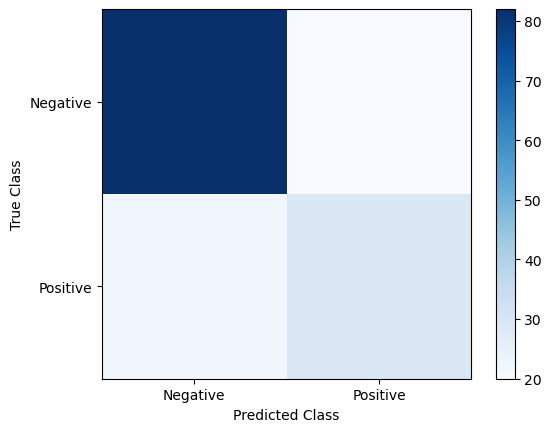

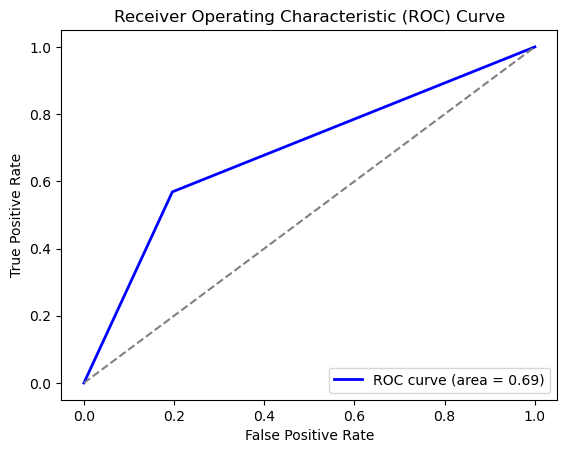

Accuracy: 0.7254901960784313
Precision: 0.5918367346938775
Recall: 0.5686274509803921
F1 Score: 0.58


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Predict the class labels for the test set
y_pred = best_classifier.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.show()

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)


In [ ]:
6:
    interpreting a decision tree involves understanding how the model is making decisions to predict 
outcomes based on the data. A decision tree is like a flowchart, where each decision is represented 
by a node that splits the data based on a specific feature (variable) and a threshold value.

'To interpret a decision tree

.Look at the trees visual representation:
.Understand the splits and branches
.Identify important variables and thresholds
.Use common sense and domain knowledge








In [ ]:
7:
    

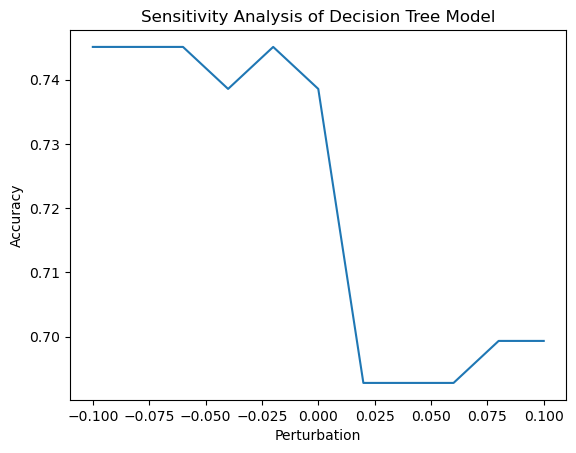

In [29]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
# Load the dataset
# Assuming X_train and y_train are the training data and labels, respectively

# Train a decision tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Perform sensitivity analysis by perturbing input data
perturbation_range = np.linspace(-0.1, 0.1, num=11) # Define the range of perturbation
accuracy_scores = []
for perturbation in perturbation_range:
    perturbed_X_test = X_test + perturbation # Apply perturbation to the test data
    accuracy = dt_model.score(perturbed_X_test, y_test) # Evaluate the model's accuracy on perturbed data
    accuracy_scores.append(accuracy)

# Plot the results
import matplotlib.pyplot as plt
plt.plot(perturbation_range, accuracy_scores)
plt.xlabel('Perturbation')
plt.ylabel('Accuracy')
plt.title('Sensitivity Analysis of Decision Tree Model')
plt.show()
